In [2]:
import numpy as np
import pandas as pd
import re

pd.options.display.max_columns
pd.options.display.max_rows
df = pd.read_csv("tokyo.csv", sep=",")
df['Prefecture'] = df['Area'].apply(lambda x: re.split('[都県]', x)[0]) 
df['City'] = df['Area'].apply(lambda x: re.split('[都県市区]', x)[1]) 

#Change Price to 10000Yen
def conver_val(x):
    if len(re.split('[万億]', x)) == 2:
        value = re.split('[万億]', x)[0]
    elif len(re.split('[万億]', x)) == 3:
        value = re.split('[億万]', x)[0] + re.split('[億万]', x)[1] 
    return float(value)
#Creating a new column for Price
df['Price'] = df['Price'].apply(lambda x: conver_val(x))
df['Price'] = df['Price']*10000

#df['Stories Tall'] = df['Stories Tall'].apply(lambda x: float(re.split('階建', x)[0]))

df['Deposit'] = df['Deposit'].apply(lambda x: x.replace("-","0"))
df['Deposit'] = df['Deposit'].apply(lambda x: float(re.split('万円', x)[0]))
df['Deposit'] = df['Deposit']*10000

df['Gratuity'] = df['Gratuity'].apply(lambda x: x.replace("-","0"))
df['Gratuity'] = df['Gratuity'].apply(lambda x: float(re.split('万円', x)[0]))
df['Gratuity'] = df['Gratuity']*10000

df['Administrative Costs'] = df['Administrative Costs'].apply(lambda x: x.replace("-","0"))
df['Administrative Costs'] = df['Administrative Costs'].apply(lambda x: float(re.split('円', x)[0]))

df['Square Meters'] = df['Square Meters'].apply(lambda x: float(re.split('m', x)[0]))

df['Price per Unit（10000Yen／Square Meters）'] =round((df['Price'] / df['Square Meters']),0)
#df['Price per Unit（10000Yen／Square Meters））'] = df['Price per Unit（10000Yen／Square Meters）'].round().astype(int)

#
df['Rooms'] = df['Rooms'].str.replace('1ワンルーム', '1Room')
df['Rooms'] = df['Rooms'].str.replace('ワンルーム', '1Room')
df['Rooms'] = df['Rooms'].apply(lambda x: int(re.search('[0-9]+', x).group(0)))

df.head()
#df.info()
#df['Floor'].unique()

,Listing Title,Area,Distances to Railway Stations,Building Age,Stories Tall,Floor,Price,Administrative Costs,Deposit,Gratuity,Rooms,Square Meters,Links to Listing,Prefecture,City,Price per Unit（10000Yen／Square Meters）
0,ルアナ,東京都あきる野市伊奈,"ＪＲ五日市線/武蔵増戸駅 歩4分,ＪＲ五日市線/武蔵引田駅 歩24分",新築,2階建,1階,65000.0,3000.0,0.0,0.0,2,47.32,https://suumo.jp/chintai/jnc_000055105229/?bc=...,東京,あきる野,1374.0
1,ルアナ,東京都あきる野市伊奈,"ＪＲ五日市線/武蔵増戸駅 歩4分,ＪＲ五日市線/武蔵引田駅 歩24分",新築,2階建,1階,65000.0,3000.0,0.0,0.0,2,47.32,https://suumo.jp/chintai/jnc_000055105230/?bc=...,東京,あきる野,1374.0
2,ルアナ,東京都あきる野市伊奈,"ＪＲ五日市線/武蔵増戸駅 歩4分,ＪＲ五日市線/武蔵引田駅 歩24分",新築,2階建,1階,68000.0,3000.0,0.0,0.0,2,51.06,https://suumo.jp/chintai/jnc_000054648287/?bc=...,東京,あきる野,1332.0
3,カーザ コリーナ,東京都青梅市野上町２,ＪＲ青梅線/河辺駅 歩15分,築5年,3階建,3階,85000.0,4000.0,85000.0,42500.0,2,57.29,https://suumo.jp/chintai/jnc_000055414464/?bc=...,東京,青梅,1484.0
4,京王相模原線 京王よみうりランド駅 2階建 築14年,東京都稲城市矢野口,"京王相模原線/京王よみうりランド駅 歩10分,ＪＲ南武線/矢野口駅 歩17分,京王相模原線/...",築14年,2階建,1階,81000.0,3900.0,0.0,0.0,1,42.49,https://suumo.jp/chintai/jnc_000037983769/?bc=...,東京,稲城,1906.0


In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

pd.options.display.max_columns
pd.options.display.max_rows
df = pd.read_csv("tokyo_cleaned.csv", sep=",")

df.drop([2959], axis = 0)

#df[df['Price per Unit（10000Yen／Square Meters）'] > 30000 ]
df[df['Price per Unit（10000Yen／Square Meters）'] < 30000 ]


,Unnamed: 0,Listing Title,Area,Prefecture,City,Distances to Railway Stations,Building Age,Stories Tall,Floor,Price,Price per Unit（10000Yen／Square Meters）,Administrative Costs,Deposit,Gratuity,Rooms,Square Meters,Links to Listing
0,0,ルアナ,東京都あきる野市伊奈,東京,あきる野,"ＪＲ五日市線/武蔵増戸駅 歩4分,ＪＲ五日市線/武蔵引田駅 歩24分",0,2階建,1階,65000,1374,3000,0,0,2,47.32,https://suumo.jp/chintai/jnc_000055105229/?bc=...
1,1,ルアナ,東京都あきる野市伊奈,東京,あきる野,"ＪＲ五日市線/武蔵増戸駅 歩4分,ＪＲ五日市線/武蔵引田駅 歩24分",0,2階建,1階,65000,1374,3000,0,0,2,47.32,https://suumo.jp/chintai/jnc_000055105230/?bc=...
2,2,ルアナ,東京都あきる野市伊奈,東京,あきる野,"ＪＲ五日市線/武蔵増戸駅 歩4分,ＪＲ五日市線/武蔵引田駅 歩24分",0,2階建,1階,68000,1332,3000,0,0,2,51.06,https://suumo.jp/chintai/jnc_000054648287/?bc=...
3,3,カーザ コリーナ,東京都青梅市野上町２,東京,青梅,ＪＲ青梅線/河辺駅 歩15分,5,3階建,3階,85000,1484,4000,85000,42500,2,57.29,https://suumo.jp/chintai/jnc_000055414464/?bc=...
4,4,京王相模原線 京王よみうりランド駅 2階建 築14年,東京都稲城市矢野口,東京,稲城,"京王相模原線/京王よみうりランド駅 歩10分,ＪＲ南武線/矢野口駅 歩17分,京王相模原線/...",14,2階建,1階,81000,1906,3900,0,0,1,42.49,https://suumo.jp/chintai/jnc_000037983769/?bc=...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191503,191503,フェニックス笹塚駅前,東京都渋谷区笹塚２,東京,渋谷,"京王線/笹塚駅 歩3分,京王線/代田橋駅 歩12分,京王新線/幡ヶ谷駅 歩11分",21,13階建,2階,72000,3871,7000,72000,72000,1,18.60,https://suumo.jp/chintai/jnc_000055004133/?bc=...
191504,191504,フェニックス笹塚駅前,東京都渋谷区笹塚２,東京,渋谷,"京王線/笹塚駅 歩3分,京王線/代田橋駅 歩12分,京王新線/幡ヶ谷駅 歩11分",21,13階建,2階,73000,3925,6000,73000,73000,1,18.60,https://suumo.jp/chintai/jnc_000054973452/?bc=...
191505,191505,ＪＲ総武線 錦糸町駅 2階建 築57年,東京都墨田区亀沢４,東京,墨田,"ＪＲ総武線/錦糸町駅 歩11分,東京メトロ半蔵門線/錦糸町駅 歩11分,都営大江戸線/両国駅...",57,2階建,2階,50000,3846,0,100000,100000,1,13.00,https://suumo.jp/chintai/jnc_000055356226/?bc=...
191506,191506,ＪＲ総武線 錦糸町駅 2階建 築57年,東京都墨田区亀沢４,東京,墨田,"ＪＲ総武線/錦糸町駅 歩11分,東京メトロ半蔵門線/錦糸町駅 歩11分,都営大江戸線/両国駅...",57,2階建,2階,75000,2885,0,150000,75000,1,26.00,https://suumo.jp/chintai/jnc_000054028853/?bc=...


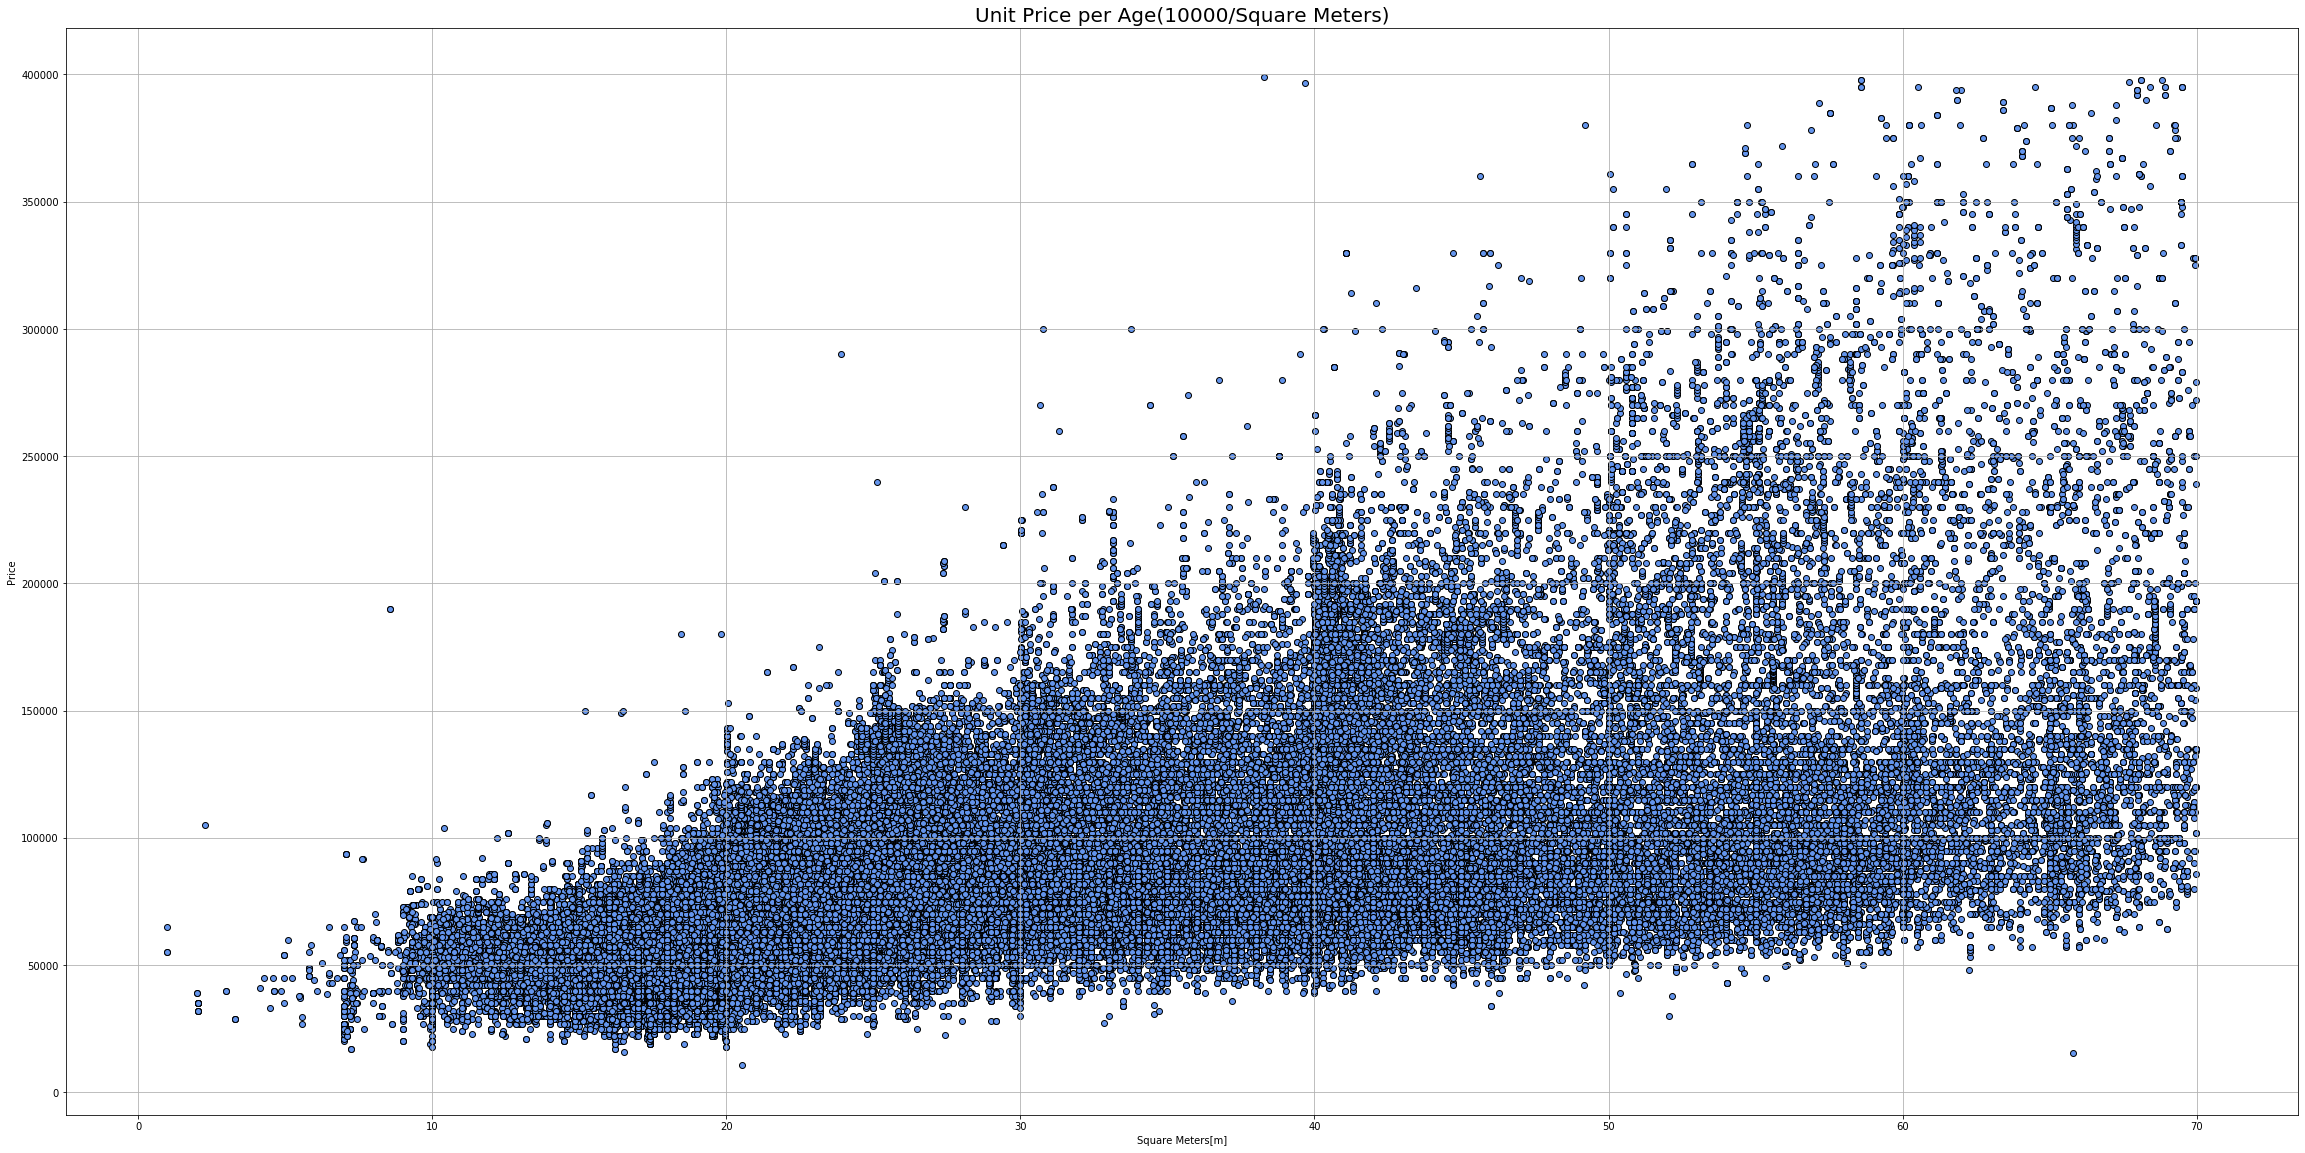

In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

pd.options.display.max_columns
pd.options.display.max_rows
df = pd.read_csv("tokyo_cleaned.csv", sep=",")

df = df[df['Price'] < 400000]
df = df[df['Square Meters'] < 70 ]


plt.figure(figsize=(40,20))
plt.scatter(x=(df['Square Meters']), y=df['Price'],marker='o' ,edgecolors='black',color='cornflowerblue')
plt.title('Unit Price per Age(10000/Square Meters)', fontsize=20)
plt.xlabel('Square Meters[m]')
plt.ylabel('Price')

plt.grid('on', which='minor', axis='x' )
plt.grid('off', which='major', axis='x' )

plt.grid('on', which='minor', axis='y' )
plt.grid('off', which='major', axis='y' )

In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

pd.options.display.max_columns
pd.options.display.max_rows
df = pd.read_csv("tokyo_cleaned.csv", sep=",")

df = df[df['Square Meters'] > 200 ]
df.head(20)

,Unnamed: 0,Listing Title,Area,Prefecture,City,Distances to Railway Stations,Building Age,Stories Tall,Floor,Price,Price per Unit（10000Yen／Square Meters）,Administrative Costs,Deposit,Gratuity,Rooms,Square Meters,Links to Listing
3151,3151,国分寺市内藤2丁目貸家,東京都国分寺市内藤２,東京,国分寺,"ＪＲ中央線/国立駅 歩10分,ＪＲ武蔵野線/西国分寺駅 歩16分,西武国分寺線/恋ヶ窪駅 歩25分",25,2階建,-,398000,1930,0,796000,398000,6,206.18,https://suumo.jp/chintai/jnc_000055426723/?bc=...
10107,10107,目黒区柿の木坂1丁目戸建,東京都目黒区柿の木坂１,東京,目黒,"東急東横線/都立大学駅 歩8分,東急東横線/学芸大学駅 歩19分,東急大井町線/自由が丘駅 ...",28,3階建,1-3階,490000,2326,0,490000,490000,5,210.65,https://suumo.jp/chintai/jnc_000055268512/?bc=...
10108,10108,目黒区柿の木坂1丁目戸建,東京都目黒区柿の木坂１,東京,目黒,"東急東横線/都立大学駅 歩8分,東急東横線/学芸大学駅 歩19分,東急大井町線/自由が丘駅 ...",28,3階建,1-3階,490000,2326,0,490000,490000,5,210.65,https://suumo.jp/chintai/jnc_000055268513/?bc=...
10109,10109,目黒区柿の木坂1丁目戸建,東京都目黒区柿の木坂１,東京,目黒,"東急東横線/都立大学駅 歩8分,東急東横線/学芸大学駅 歩19分,東急大井町線/自由が丘駅 ...",28,3階建,1-3階,520000,2469,0,520000,520000,5,210.65,https://suumo.jp/chintai/jnc_000053958322/?bc=...
10110,10110,目黒区柿の木坂1丁目戸建,東京都目黒区柿の木坂１,東京,目黒,"東急東横線/都立大学駅 歩8分,東急東横線/学芸大学駅 歩19分,東急大井町線/自由が丘駅 ...",28,3階建,1-3階,520000,2469,0,520000,520000,5,210.65,https://suumo.jp/chintai/jnc_000053942887/?bc=...
24613,24613,Omotesando Court 表参道コート,東京都渋谷区神宮前５,東京,渋谷,"東京メトロ銀座線/表参道駅 歩4分,東京メトロ千代田線/明治神宮前駅 歩7分,ＪＲ山手線/原...",20,地下1地上4階建,2階,1400000,4749,0,4200000,1400000,4,294.80,https://suumo.jp/chintai/jnc_000054350678/?bc=...
26816,26816,駒沢3丁目貸家,東京都世田谷区駒沢３,東京,世田谷,"東急田園都市線/駒沢大学駅 歩8分,東急田園都市線/桜新町駅 歩10分,東急世田谷線/世田谷...",28,地下1地上2階建,B1-2階,600000,2055,0,1200000,600000,6,291.99,https://suumo.jp/chintai/jnc_000055274728/?bc=...
30027,30027,ガーデン高輪,東京都港区高輪４,東京,港,"都営浅草線/高輪台駅 歩8分,ＪＲ山手線/品川駅 歩14分,ＪＲ山手線/五反田駅 歩14分",11,地下2地上4階建,3階,1130000,5184,0,2260000,1130000,4,217.99,https://suumo.jp/chintai/jnc_000055290563/?bc=...
30028,30028,ガーデン高輪,東京都港区高輪４,東京,港,"都営浅草線/高輪台駅 歩8分,ＪＲ山手線/品川駅 歩14分,ＪＲ山手線/五反田駅 歩14分",11,地下2地上4階建,3階,1290000,5161,0,2580000,1290000,4,249.96,https://suumo.jp/chintai/jnc_000052364958/?bc=...
30029,30029,ガーデン高輪,東京都港区高輪４,東京,港,"都営浅草線/高輪台駅 歩8分,ＪＲ山手線/品川駅 歩14分,ＪＲ山手線/五反田駅 歩14分",11,地下2地上4階建,3階,1320000,5222,0,2640000,1320000,5,252.79,https://suumo.jp/chintai/jnc_000054385544/?bc=...


intercept =31715.045902546823
slope =1880.5445473173115


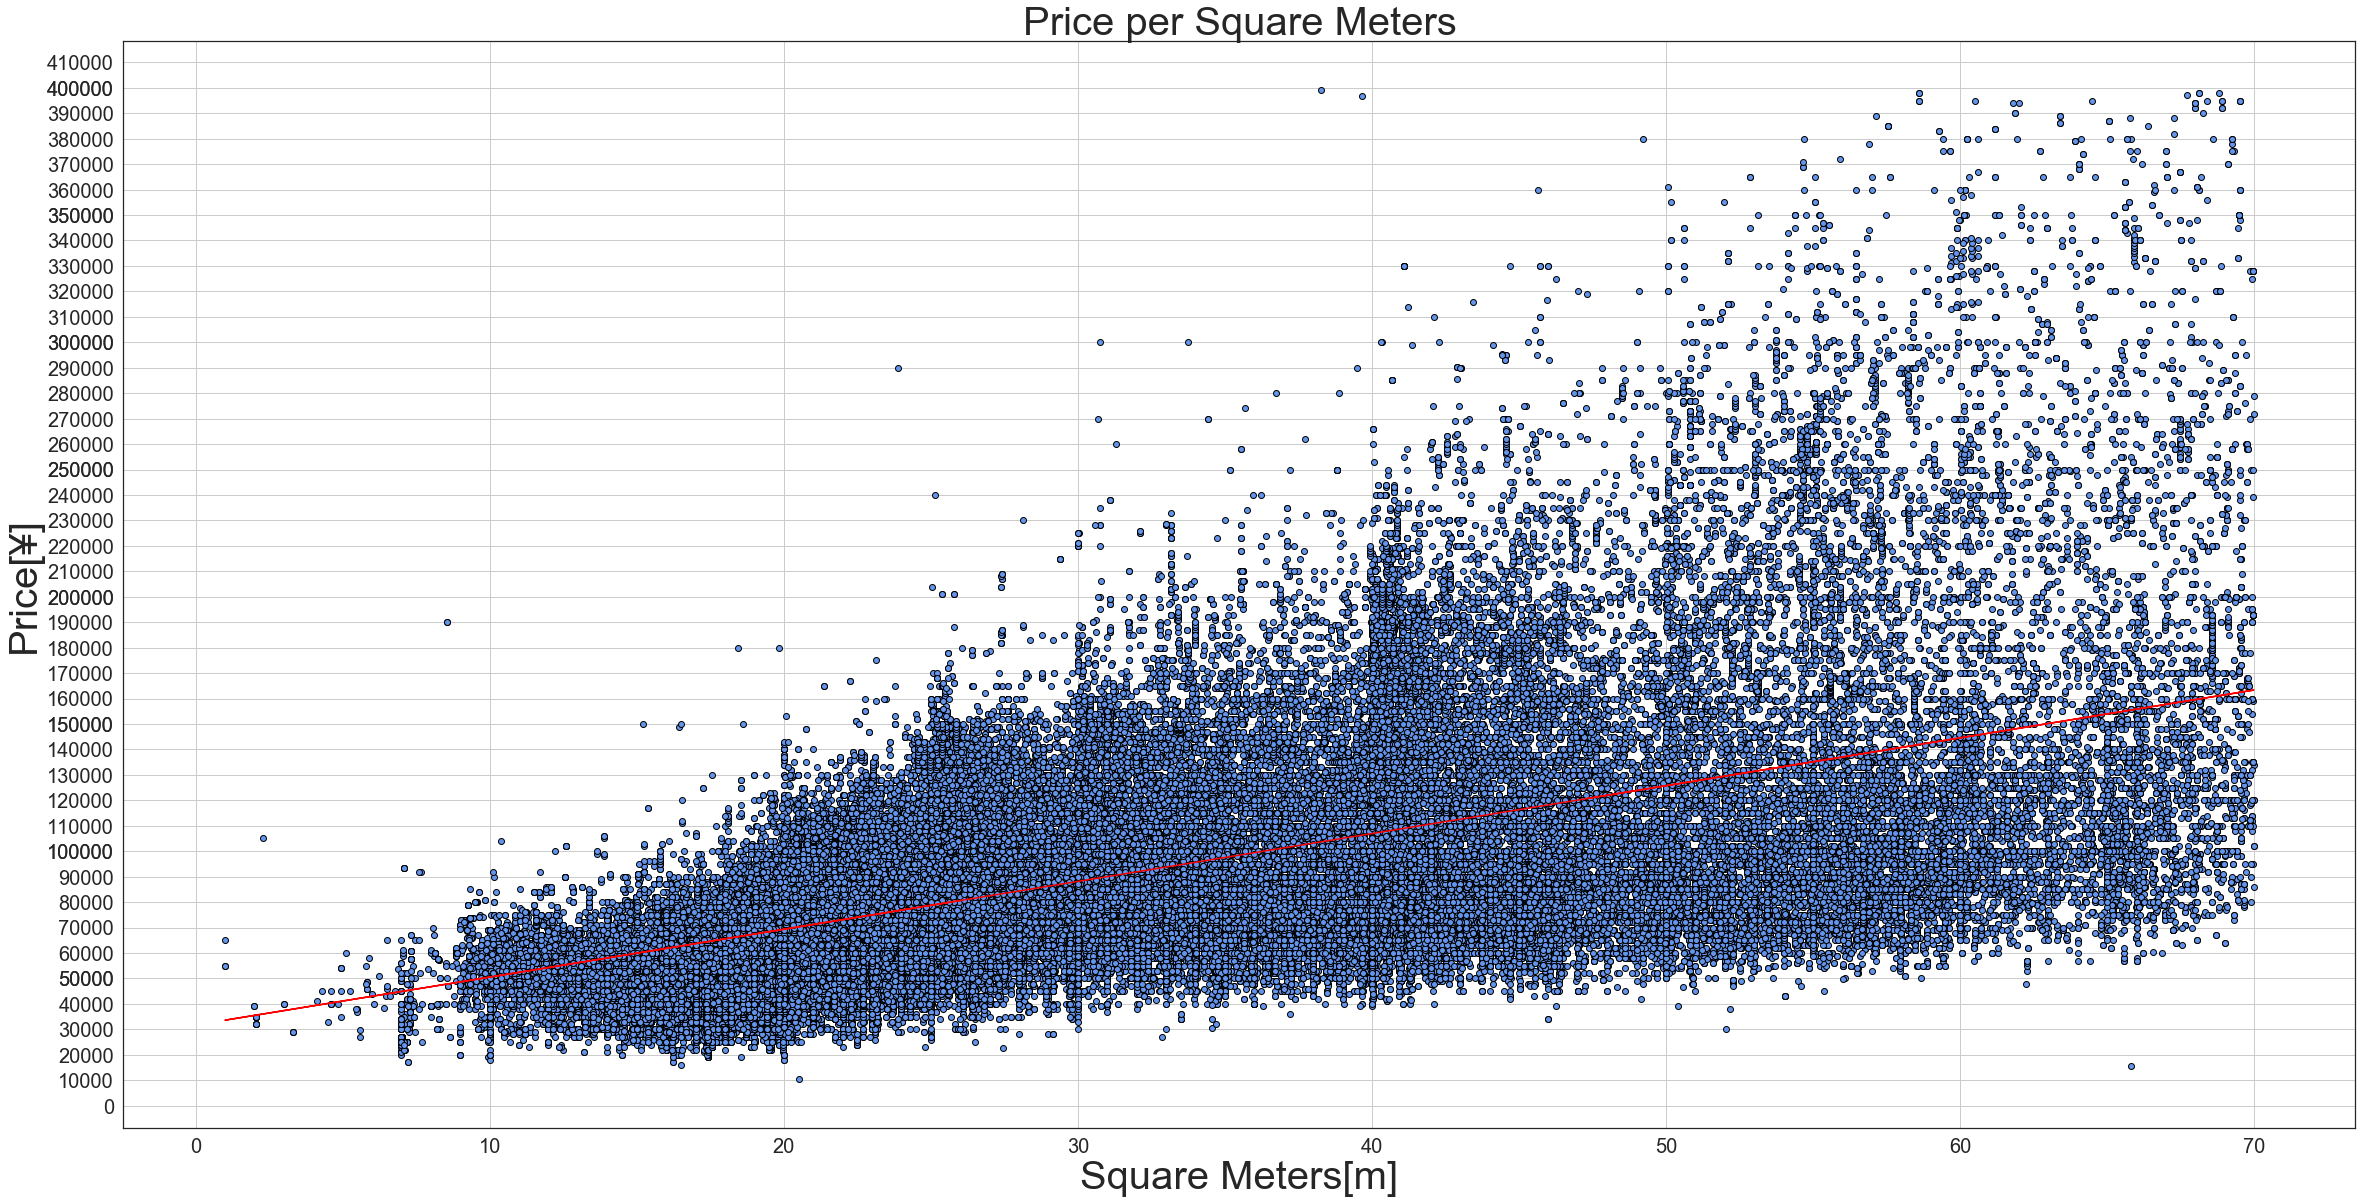

In [201]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

pd.options.display.max_columns
pd.options.display.max_rows
df = pd.read_csv("tokyo_cleaned.csv", sep=",")

df = df[df['Price'] < 400000]
df = df[df['Square Meters'] < 70 ]


plt.figure(figsize=(40,20))
plt.scatter(x=(df['Square Meters']), y=df['Price'],marker='o' ,edgecolors='black',color='cornflowerblue')
plt.title('Price per Square Meters', fontsize=40)
plt.xlabel('Square Meters[m]', fontsize=40)
plt.ylabel('Price[¥]', fontsize=40)
plt.tick_params(labelsize = 20) 
#plt.colorbar()
plt.grid(True)

extraticks=[]
for i in range(10000,450000,10000):
    extraticks.append(i)

plt.yticks(list(plt.yticks()[0]) + extraticks)

x=df['Square Meters']
y=df['Price']

#m = slope, b=intercept
slope, intercept = np.polyfit(x, y, 1)
plt.plot(x, slope*x + intercept, color='red')
print("intercept =" + str(intercept))
print("slope =" + str(slope))

intercept =120902.24298578258
slope =-1281.6775184109606


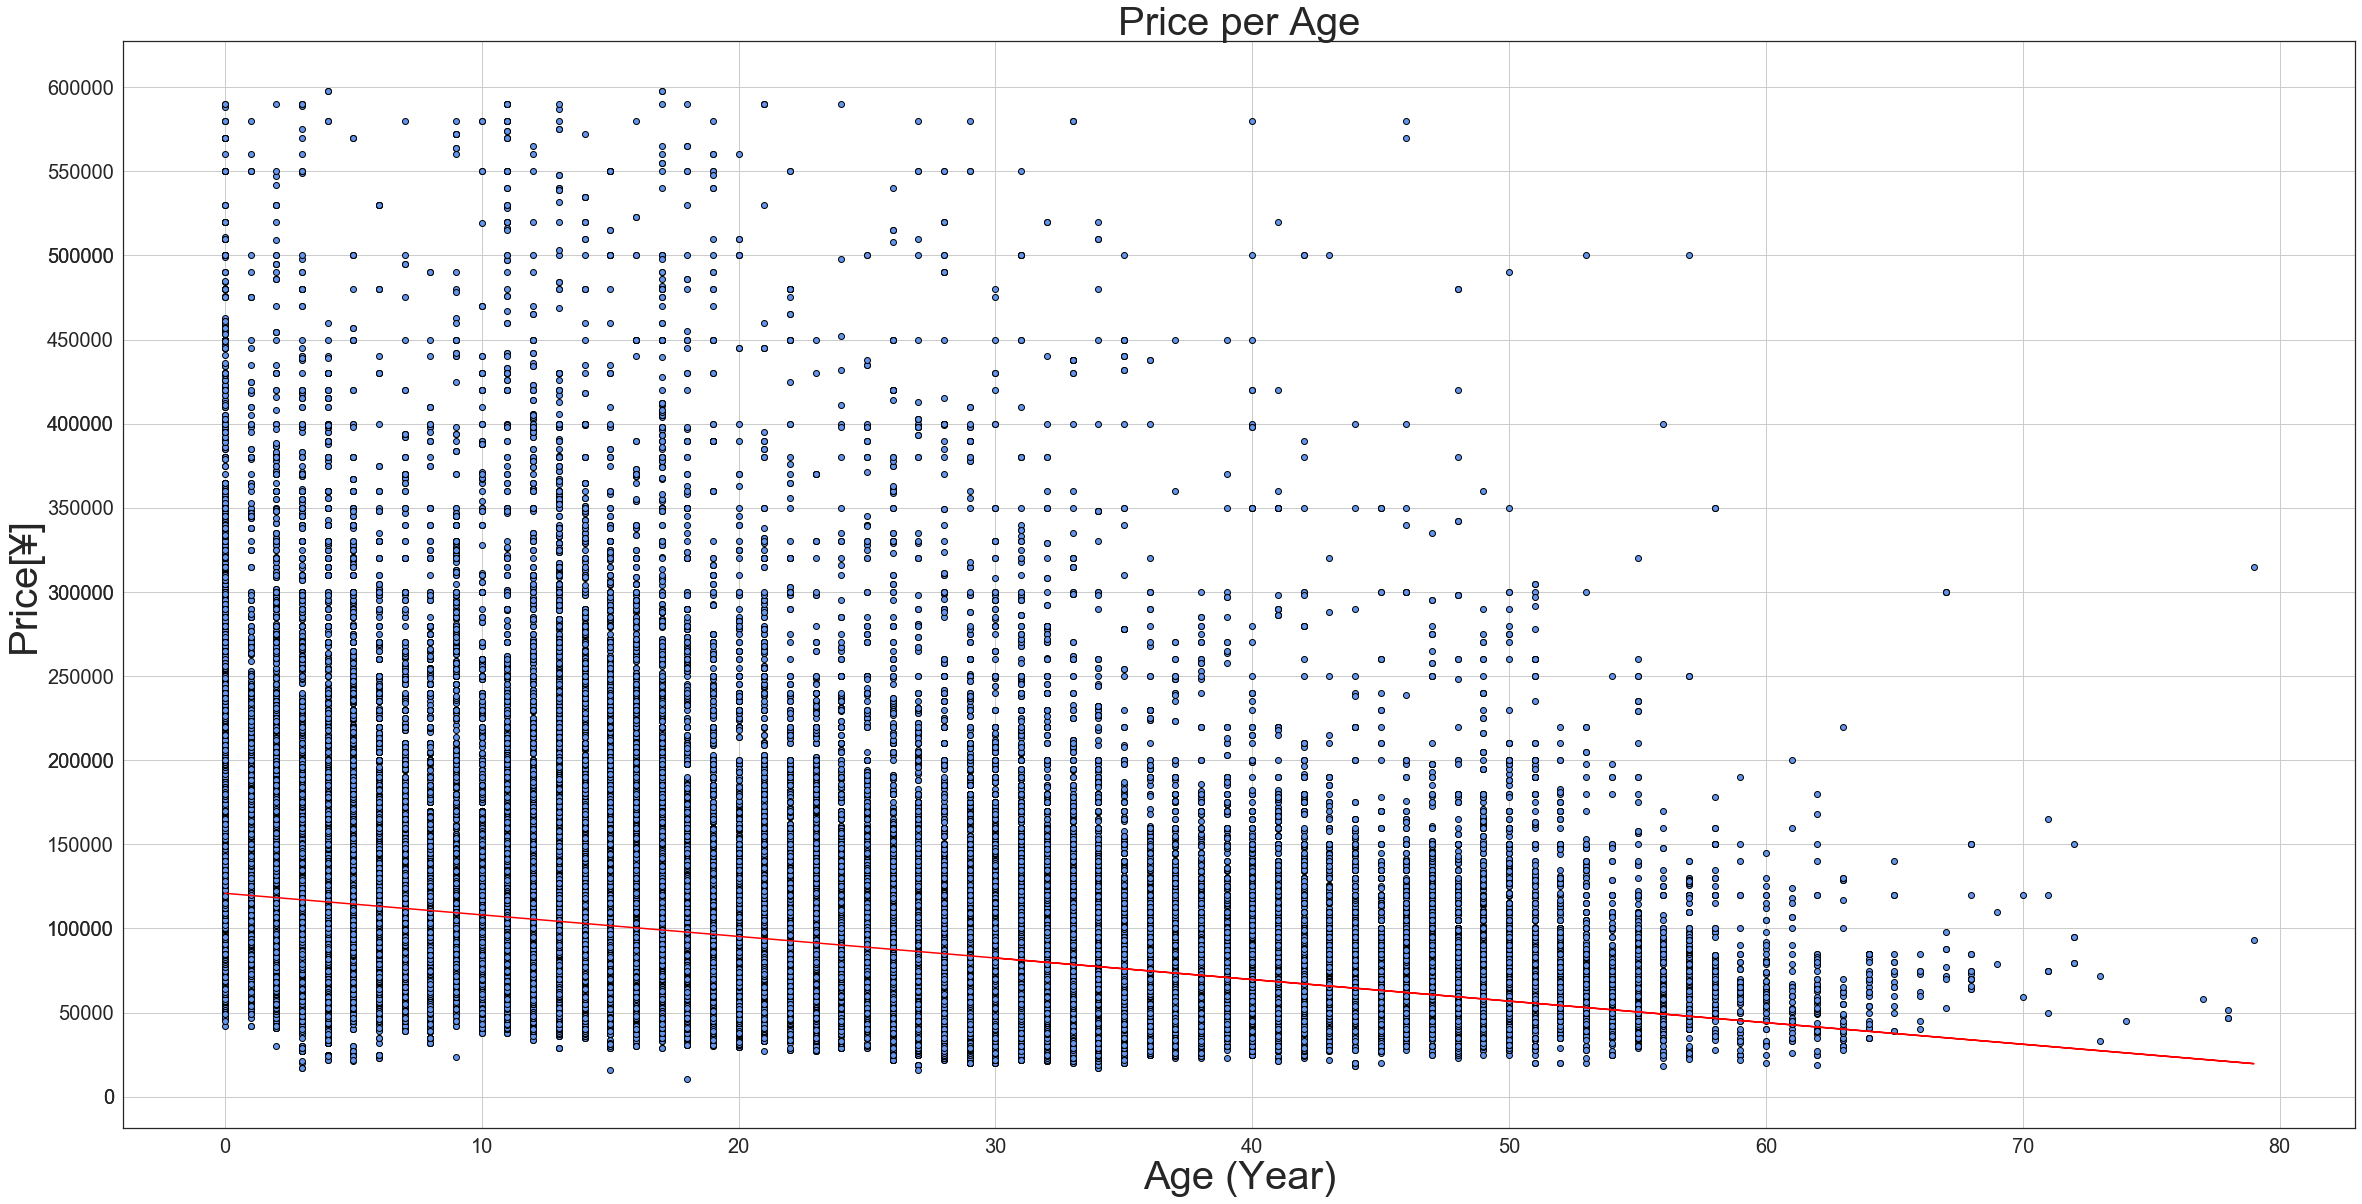

In [200]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

pd.options.display.max_columns
pd.options.display.max_rows
df = pd.read_csv("tokyo_cleaned.csv", sep=",")

df = df[df['Price'] < 600000]
df = df[df['Building Age'] < 80 ]

plt.figure(figsize=(40,20))
plt.scatter(x=(df['Building Age']), y=df['Price'],marker='o' ,edgecolors='black',color='cornflowerblue')
plt.title('Price per Age', fontsize=40)
plt.xlabel('Age (Year)', fontsize=40)
plt.ylabel('Price[¥]', fontsize=40)
plt.tick_params(labelsize = 20) 
plt.grid(True)

x=df['Building Age']
y=df['Price']

extraticks=[]
for i in range(0,600000,50000):
    extraticks.append(i)

plt.yticks(list(plt.yticks()[0]) + extraticks)

#m = slope, b=intercept
slope, intercept = np.polyfit(x, y, 1)
plt.plot(x, slope*x + intercept, color='red')
print("intercept =" + str(intercept))
print("slope =" + str(slope))

In [76]:
import pandas as pd
import re

#read csv file
pd.options.display.max_columns
pd.options.display.max_rows
df = pd.read_csv("tokyo_cleaned.csv", sep=",")

#split "Distances to Railway Stations" column into "Line"
df['Line Name'] = df['Distances to Railway Stations'].apply(lambda x: x.split('/')[0])
#split the column into "Station"
df['Station Name'] = df['Distances to Railway Stations'].apply(lambda x: x.split('/')[1].split(' ')[0])
#split the column into "Method"
df['Method'] = df['Distances to Railway Stations'].apply(lambda x: re.split(r'[0-9]+', x.split('/')[1].split(' ')[1])[0])
#split the column into "Time"
df['Time Takes to Station[minute]'] = df['Distances to Railway Stations'].apply(lambda x: int(re.search('[0-9]+', x.split('/')[1].split(' ')[1]).group(0)))

df.head()

,Unnamed: 0,Listing Title,Area,Prefecture,City,Distances to Railway Stations,Building Age,Stories Tall,Floor,Price,...,Administrative Costs,Deposit,Gratuity,Rooms,Square Meters,Links to Listing,路線,駅名,手段,所要時間(分）
0,0,ルアナ,東京都あきる野市伊奈,東京,あきる野,"ＪＲ五日市線/武蔵増戸駅 歩4分,ＪＲ五日市線/武蔵引田駅 歩24分",0,2,1,65000,...,3000,0,0,2,47.32,https://suumo.jp/chintai/jnc_000055105229/?bc=...,ＪＲ五日市線,武蔵増戸駅,歩,4
1,1,ルアナ,東京都あきる野市伊奈,東京,あきる野,"ＪＲ五日市線/武蔵増戸駅 歩4分,ＪＲ五日市線/武蔵引田駅 歩24分",0,2,1,65000,...,3000,0,0,2,47.32,https://suumo.jp/chintai/jnc_000055105230/?bc=...,ＪＲ五日市線,武蔵増戸駅,歩,4
2,2,ルアナ,東京都あきる野市伊奈,東京,あきる野,"ＪＲ五日市線/武蔵増戸駅 歩4分,ＪＲ五日市線/武蔵引田駅 歩24分",0,2,1,68000,...,3000,0,0,2,51.06,https://suumo.jp/chintai/jnc_000054648287/?bc=...,ＪＲ五日市線,武蔵増戸駅,歩,4
3,3,カーザ コリーナ,東京都青梅市野上町２,東京,青梅,ＪＲ青梅線/河辺駅 歩15分,5,3,3,85000,...,4000,85000,42500,2,57.29,https://suumo.jp/chintai/jnc_000055414464/?bc=...,ＪＲ青梅線,河辺駅,歩,15
4,4,京王相模原線 京王よみうりランド駅 2階建 築14年,東京都稲城市矢野口,東京,稲城,"京王相模原線/京王よみうりランド駅 歩10分,ＪＲ南武線/矢野口駅 歩17分,京王相模原線/...",14,2,1,81000,...,3900,0,0,1,42.49,https://suumo.jp/chintai/jnc_000037983769/?bc=...,京王相模原線,京王よみうりランド駅,歩,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191503,191503,フェニックス笹塚駅前,東京都渋谷区笹塚２,東京,渋谷,"京王線/笹塚駅 歩3分,京王線/代田橋駅 歩12分,京王新線/幡ヶ谷駅 歩11分",21,13,2,72000,...,7000,72000,72000,1,18.60,https://suumo.jp/chintai/jnc_000055004133/?bc=...,京王線,笹塚駅,歩,3
191504,191504,フェニックス笹塚駅前,東京都渋谷区笹塚２,東京,渋谷,"京王線/笹塚駅 歩3分,京王線/代田橋駅 歩12分,京王新線/幡ヶ谷駅 歩11分",21,13,2,73000,...,6000,73000,73000,1,18.60,https://suumo.jp/chintai/jnc_000054973452/?bc=...,京王線,笹塚駅,歩,3
191505,191505,ＪＲ総武線 錦糸町駅 2階建 築57年,東京都墨田区亀沢４,東京,墨田,"ＪＲ総武線/錦糸町駅 歩11分,東京メトロ半蔵門線/錦糸町駅 歩11分,都営大江戸線/両国駅...",57,2,2,50000,...,0,100000,100000,1,13.00,https://suumo.jp/chintai/jnc_000055356226/?bc=...,ＪＲ総武線,錦糸町駅,歩,11
191506,191506,ＪＲ総武線 錦糸町駅 2階建 築57年,東京都墨田区亀沢４,東京,墨田,"ＪＲ総武線/錦糸町駅 歩11分,東京メトロ半蔵門線/錦糸町駅 歩11分,都営大江戸線/両国駅...",57,2,2,75000,...,0,150000,75000,1,26.00,https://suumo.jp/chintai/jnc_000054028853/?bc=...,ＪＲ総武線,錦糸町駅,歩,11


In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import re

pd.options.display.max_columns
pd.options.display.max_rows
df = pd.read_csv("suumo_tokyo_data.csv", sep=",")

df['Method'].unique()

array(['歩', 'バス', '車'], dtype=object)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.options.display.max_columns
pd.options.display.max_rows
df = pd.read_csv("suumo_tokyo_data.csv", sep=",")

x = df[['Time[min]', 'Building Age', 'Floor', 'Administrative Costs', 'Deposit', 'Gratuity', 'Number of Rooms', 'Square Meters']]
y = df[['Price']]

#run multiple regresion
from sklearn import preprocessing

sscaler = preprocessing.StandardScaler()
sscaler.fit(x)
xss_sk = sscaler.transform(x) 
sscaler.fit(y)
yss_sk = sscaler.transform(y)


#show summary plots
import statsmodels.api as sm

x_add_const = sm.add_constant(xss_sk)
model_sm = sm.OLS(yss_sk, x_add_const).fit()

results = model_sm.summary(yname = 'Price', xname=['Const', 'Time to Station', 'Building Age', 'Floor', 'Administrative Costs', 'Deposit', 'Gratuity', 'Number of Rooms', 'Square Meters'])
print(results)

#show correlation coefficient
from sklearn import preprocessing

sscaler = preprocessing.StandardScaler()
sscaler.fit(x)
xss_sk = sscaler.transform(x) 
sscaler.fit(y)
yss_sk = sscaler.transform(y)

print(xss_sk)
print(yss_sk)

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                 1.678e+05
Date:                Thu, 09 Apr 2020   Prob (F-statistic):               0.00
Time:                        21:28:44   Log-Likelihood:                -72496.
No. Observations:              191508   AIC:                         1.450e+05
Df Residuals:                  191499   BIC:                         1.451e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Const                -4.112e-17 

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.options.display.max_columns
pd.options.display.max_rows
df = pd.read_csv("suumo_tokyo_data.csv", sep=",")

x = df[[ 'Building Age', 'Administrative Costs', 'Square Meters']]
y = df[['Price']]

#run multiple regresion
from sklearn import preprocessing

sscaler = preprocessing.StandardScaler()
sscaler.fit(x)
xss_sk = sscaler.transform(x) 
sscaler.fit(y)
yss_sk = sscaler.transform(y)


#show summary plots
import statsmodels.api as sm

x_add_const = sm.add_constant(xss_sk)
model_sm = sm.OLS(yss_sk, x_add_const).fit()

results = model_sm.summary(yname = 'Price', xname=['Const', 'Building Age', 'Administrative Costs', 'Square Meters'])
print(results)

#show correlation coefficient
from sklearn import preprocessing

sscaler = preprocessing.StandardScaler()
sscaler.fit(x)
xss_sk = sscaler.transform(x) 
sscaler.fit(y)
yss_sk = sscaler.transform(y)

print(xss_sk)
print(yss_sk)

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                 7.540e+04
Date:                Tue, 17 Mar 2020   Prob (F-statistic):               0.00
Time:                        22:15:58   Log-Likelihood:            -1.9706e+05
No. Observations:              191508   AIC:                         3.941e+05
Df Residuals:                  191504   BIC:                         3.942e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Const                -4.112e-17 

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.options.display.max_columns
pd.options.display.max_rows
df = pd.read_csv("suumo_tokyo_data_jp.csv", sep=",")

x = df[['所要時間[分]', '築年数[年]', '階数', '管理費[円]', '保証金[円]', '礼金[円]', '部屋数', '専有面積[m2]']]
y = df[['価格[円]']]

#run multiple regresion
from sklearn import preprocessing

sscaler = preprocessing.StandardScaler()
sscaler.fit(x)
xss_sk = sscaler.transform(x) 
sscaler.fit(y)
yss_sk = sscaler.transform(y)


#show summary plots
import statsmodels.api as sm

x_add_const = sm.add_constant(xss_sk)
model_sm = sm.OLS(yss_sk, x_add_const).fit()

results = model_sm.summary(yname = '価格[円]', xname=['切片', '駅までの所要時間[分]', '築年数', '階数', '管理費', '保証金', '礼金', '部屋数', '専有面積[m2]'])
print(results)

#show correlation coefficient
from sklearn import preprocessing

sscaler = preprocessing.StandardScaler()
sscaler.fit(x)
xss_sk = sscaler.transform(x) 
sscaler.fit(y)
yss_sk = sscaler.transform(y)

print(xss_sk)
print(yss_sk)

                            OLS Regression Results                            
Dep. Variable:                  価格[円]   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                 1.678e+05
Date:                Wed, 18 Mar 2020   Prob (F-statistic):               0.00
Time:                        18:48:19   Log-Likelihood:                -72496.
No. Observations:              191508   AIC:                         1.450e+05
Df Residuals:                  191499   BIC:                         1.451e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
切片          -4.112e-17      0.001  -5.09e-14      

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.options.display.max_columns
pd.options.display.max_rows
df = pd.read_csv("suumo_tokyo_data_jp.csv", sep=",")

x = df[['所要時間[分]', '築年数[年]', '階数', '管理費[円]', '保証金[円]', '礼金[円]', '部屋数', '専有面積[m2]']]
y = df[['価格[円]']]

#run multiple regresion
from sklearn import preprocessing

sscaler = preprocessing.StandardScaler()
sscaler.fit(x)
xss_sk = sscaler.transform(x) 
sscaler.fit(y)
yss_sk = sscaler.transform(y)


#show summary plots
import statsmodels.api as sm

x_add_const = sm.add_constant(xss_sk)
model_sm = sm.OLS(yss_sk, x_add_const).fit()

results = model_sm.summary(yname = '価格[円]', xname=['切片', '駅までの所要時間[分]', '築年数', '階数', '管理費', '保証金', '礼金', '部屋数', '専有面積[m2]'])
print(results)

#show correlation coefficient
from sklearn import preprocessing

sscaler = preprocessing.StandardScaler()
sscaler.fit(x)
xss_sk = sscaler.transform(x) 
sscaler.fit(y)
yss_sk = sscaler.transform(y)

print(xss_sk)
print(yss_sk)

                            OLS Regression Results                            
Dep. Variable:                  価格[円]   R-squared:                       0.301
Model:                            OLS   Adj. R-squared:                  0.301
Method:                 Least Squares   F-statistic:                 1.649e+04
Date:                Wed, 18 Mar 2020   Prob (F-statistic):               0.00
Time:                        11:36:10   Log-Likelihood:            -2.3745e+05
No. Observations:              191508   AIC:                         4.749e+05
Df Residuals:                  191502   BIC:                         4.750e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
切片          -4.112e-17      0.002  -2.15e-14      

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.options.display.max_columns
pd.options.display.max_rows
df = pd.read_csv("suumo_tokyo_data_jp.csv", sep=",")

df['階数'].unique()

array([ 1,  3,  2,  5,  4,  6,  9, 12,  7, 10,  0,  8, 14, 11, 13, 21, 25,
       15, 19, 16, 34, 23, 28, 29, 18, 35, 26, 30, 32, 45, 20, 17, 24, 22,
       27, 51, 33, 46, 40, 44, 38, 37, 36, 31])

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.options.display.max_columns
pd.options.display.max_rows
df = pd.read_csv("suumo_tokyo_data_jp.csv", sep=",")

x = df[['所要時間[分]', '築年数[年]', '階数', '管理費[円]', '保証金[円]', '礼金[円]', '部屋数', '専有面積[m2]']]
y = df[['価格[円]']]

#run multiple regresion
from sklearn import preprocessing

sscaler = preprocessing.StandardScaler()
sscaler.fit(x)
xss_sk = sscaler.transform(x) 
sscaler.fit(y)
yss_sk = sscaler.transform(y)


#show summary plots
import statsmodels.api as sm

x_add_const = sm.add_constant(xss_sk)
model_sm = sm.OLS(yss_sk, x_add_const).fit()

results = model_sm.summary(yname = '価格[円]', xname=['切片', '駅までの所要時間[分]', '築年数', '階数', '管理費', '保証金', '礼金', '部屋数', '専有面積[m2]'])
print(results)

#show correlation coefficient
from sklearn import preprocessing

sscaler = preprocessing.StandardScaler()
sscaler.fit(x)
xss_sk = sscaler.transform(x) 
sscaler.fit(y)
yss_sk = sscaler.transform(y)

print(xss_sk)
print(yss_sk)

                            OLS Regression Results                            
Dep. Variable:                  価格[円]   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                  0.092
Method:                 Least Squares   F-statistic:                     6473.
Date:                Wed, 18 Mar 2020   Prob (F-statistic):               0.00
Time:                        11:40:44   Log-Likelihood:            -2.6249e+05
No. Observations:              191508   AIC:                         5.250e+05
Df Residuals:                  191504   BIC:                         5.250e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
切片          -4.112e-17      0.002  -1.89e-14      

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.options.display.max_columns
pd.options.display.max_rows
df = pd.read_csv("suumo_tokyo_data_jp.csv", sep=",")

x = df[['築年数[年]', '保証金[円]', '専有面積[m2]']]
y = df[['価格[円]']]

#run multiple regresion
from sklearn import preprocessing

sscaler = preprocessing.StandardScaler()
sscaler.fit(x)
xss_sk = sscaler.transform(x) 
sscaler.fit(y)
yss_sk = sscaler.transform(y)


#show summary plots
import statsmodels.api as sm

x_add_const = sm.add_constant(xss_sk)
model_sm = sm.OLS(yss_sk, x_add_const).fit()

results = model_sm.summary(yname = '価格[円]', xname=['切片', '築年数', '保証金', '専有面積[m2]'])
print(results)

#show correlation coefficient
from sklearn import preprocessing

sscaler = preprocessing.StandardScaler()
sscaler.fit(x)
xss_sk = sscaler.transform(x) 
sscaler.fit(y)
yss_sk = sscaler.transform(y)

print(xss_sk)
print(yss_sk)

                            OLS Regression Results                            
Dep. Variable:                  価格[円]   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                 2.714e+05
Date:                Wed, 18 Mar 2020   Prob (F-statistic):               0.00
Time:                        19:17:41   Log-Likelihood:            -1.1294e+05
No. Observations:              191508   AIC:                         2.259e+05
Df Residuals:                  191504   BIC:                         2.259e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
切片         -4.112e-17      0.001  -4.12e-14      1.0

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.options.display.max_columns
pd.options.display.max_rows
df = pd.read_csv("suumo_tokyo_data.csv", sep=",")

x = df[['Building Age','Time[min]', 'Deposit', 'Square Meters']]
y = df[['Price']]

#run multiple regresion
from sklearn import preprocessing

sscaler = preprocessing.StandardScaler()
sscaler.fit(x)
xss_sk = sscaler.transform(x) 
sscaler.fit(y)
yss_sk = sscaler.transform(y)


#show summary plots
import statsmodels.api as sm

x_add_const = sm.add_constant(xss_sk)
model_sm = sm.OLS(yss_sk, x_add_const).fit()

results = model_sm.summary(yname = 'Price', xname=['Const', 'Building Age', 'Time to Station', 'Deposit', 'Square Meters'])
print(results)

#show correlation coefficient
from sklearn import preprocessing

sscaler = preprocessing.StandardScaler()
sscaler.fit(x)
xss_sk = sscaler.transform(x) 
sscaler.fit(y)
yss_sk = sscaler.transform(y)

print(xss_sk)
print(yss_sk)

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                 2.174e+05
Date:                Fri, 10 Apr 2020   Prob (F-statistic):               0.00
Time:                        12:56:13   Log-Likelihood:            -1.0778e+05
No. Observations:              191508   AIC:                         2.156e+05
Df Residuals:                  191503   BIC:                         2.156e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Const           -4.112e-17      0.001  -4.

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

pd.options.display.max_columns
pd.options.display.max_rows
df = pd.read_csv("suumo_tokyo_data.csv", sep=",")

df = df[df['Price'] < 20000]
#df = df[df['Square Meters'] > 60 ]
#df = df[df['Time[min]'] < 15 ]
df

,Listing Title,Area,Prefecture,City,Distances to Railway Stations,Line,Station,Method,Time[min],Building Age,Stories Tall,Floor,Price,Administrative Costs,Deposit,Gratuity,Number of Rooms,Square Meters,Links to Listing,Price per Unit（10000Yen／Square Meters）
10478,西武新宿線 花小金井駅 14階建 築15年,東京都小平市花小金井１,東京,小平,"西武新宿線/花小金井駅 歩2分,西武新宿線/田無駅 車8分(3.4km),西武新宿線/小平駅...",西武新宿線,花小金井駅,歩,2,15,14,7,15600,11500,15600,0,1,65.80,https://suumo.jp/chintai/jnc_000055434568/?bc=...,237
49852,メインステージ麻布十番II,東京都港区東麻布３,東京,港,"東京メトロ南北線/麻布十番駅 歩2分,都営大江戸線/赤羽橋駅 歩6分,東京メトロ南北線/六本...",東京メトロ南北線,麻布十番駅,歩,2,18,11,11,10600,9000,10600,10600,1,20.52,https://suumo.jp/chintai/jnc_000055433003/?bc=...,517
113958,TCRE新小岩三丁目,東京都葛飾区新小岩３,東京,葛飾,"ＪＲ総武線/新小岩駅 歩10分,ＪＲ総武線/小岩駅 歩36分,ＪＲ総武線/平井駅 歩40分",ＪＲ総武線,新小岩駅,歩,10,62,2,2,19000,10000,0,0,1,9.93,https://suumo.jp/chintai/jnc_000055244584/?bc=...,1913
130853,アウステル,東京都町田市大蔵町,東京,町田,"小田急線/鶴川駅 バス12分 (バス停)街道口 歩2分,京王相模原線/若葉台駅 バス14分 ...",小田急線,鶴川駅,バス,12,27,3,3,19000,3000,0,0,1,17.41,https://suumo.jp/chintai/jnc_000031561810/?bc=...,1091
130854,アウステル,東京都町田市大蔵町,東京,町田,"小田急線/鶴川駅 バス12分 (バス停)街道口 歩2分,京王相模原線/若葉台駅 バス14分 ...",小田急線,鶴川駅,バス,12,27,3,3,19000,3000,0,0,1,17.41,https://suumo.jp/chintai/jnc_000051784594/?bc=...,1091
131994,フローラハウス,東京都町田市大蔵町,東京,町田,"小田急線/鶴川駅 バス12分 (バス停)街道口 歩3分,京王相模原線/若葉台駅 バス14分 ...",小田急線,鶴川駅,バス,12,27,2,1,19000,3000,0,0,1,17.41,https://suumo.jp/chintai/jnc_000055315014/?bc=...,1091
131995,フローラハウス,東京都町田市大蔵町,東京,町田,"小田急線/鶴川駅 バス12分 (バス停)街道口 歩3分,京王相模原線/若葉台駅 バス14分 ...",小田急線,鶴川駅,バス,12,27,2,1,19000,3000,0,0,1,17.41,https://suumo.jp/chintai/jnc_000054061058/?bc=...,1091
131996,フローラハウス,東京都町田市大蔵町,東京,町田,"小田急線/鶴川駅 バス12分 (バス停)街道口 歩3分,京王相模原線/若葉台駅 バス14分 ...",小田急線,鶴川駅,バス,12,27,2,1,19000,4000,0,0,1,17.41,https://suumo.jp/chintai/jnc_000040534973/?bc=...,1091
144097,若竹荘 １階１号,東京都練馬区旭丘２,東京,練馬,"西武池袋線/江古田駅 歩7分,都営大江戸線/新江古田駅 歩10分",西武池袋線,江古田駅,歩,7,56,2,1,18000,2000,18000,18000,1,10.00,https://suumo.jp/chintai/jnc_000055322485/?bc=...,1800
155255,京王相模原線 京王永山駅 5階建 築34年,東京都多摩市貝取１,東京,多摩,"京王相模原線/京王永山駅 歩7分,小田急多摩線/小田急永山駅 歩7分,京王相模原線/京王多摩...",京王相模原線,京王永山駅,歩,7,34,5,1,17000,10000,0,0,1,16.22,https://suumo.jp/chintai/jnc_000044404811/?bc=...,1048
